# Introduction

Let's be realistic, what would the world be without Starbucks? The stock price of this famous company represents the key to its sustainability and success. From this perspective, we, proud inhabitants of the kingdom of Liège coffee, tried to understand what was making our beloved beans successful.
In today's financial world, where global events and shifting public opinion play such a huge role, understanding what drives stock prices helps explain market trends. Market sentiments, particularly during pivotal economic and social times, play a very significant role in determining the performance of publicly traded companies.
Our study looks at Starbucks Corporation, one of the leading companies in discretionary spending. We chose this company. Two extremely significant periods substantially influenced its stock behavior.
COVID-19 pandemia (2019-2020) changed people's shopping habits and vitally affected Starbucks' finances because of store closures, reduced numbers of customers, and a shift towards take away options.
In 2023, there have been calls to boycott Starbucks linked to the Israel-Palestine conflict, affecting its reputation and potentially affecting the stock value.
The purpose will be served in such an event's ability to show, really, how market sentiment and economic factors come together to influence stock prices. Detailed research of financial data and public opinions is envisaged in this project. The object of this work is to identify profoundly meaningful trends and dynamics that shape the value of this outstandingly symbolic company in a continuously changing market.

# Data ingestion and preprocessing

TASK 1

In [6]:
!pip install yfinance
!pip install pandas
!pip install praw
import yfinance as yf
import pandas as pd

# Download historical data for SBUX
data = yf.download("SBUX", start="2019-01-01", end="2024-12-01")

SBUX_close_data = data['Close']

SBUX_close_data.to_csv("SBUX_price_data_close.csv")

# Load adjusted data from CSV
SBUX_close_data = pd.read_csv("SBUX_price_data_close.csv", index_col=0)

#Data in month
# Convert index to DatetimeIndex
SBUX_close_data.index = pd.to_datetime(SBUX_close_data.index)

# Resample the data to obtain the monthly average
SBUX_close_data_per_month = SBUX_close_data.resample('M').mean()

# Save adjusted monthly data in CSV format
SBUX_close_data_per_month.to_csv("SBUX_price_data_close_per_month.csv")

# Load adjusted data from CSV
SBUX_close_data_per_month = pd.read_csv("SBUX_price_data_close_per_month.csv", index_col=0)


print("Le prix de clôture par mois est :")
print(SBUX_close_data_per_month.head())


relative_path = 'SBUX_price_data_close_per_month.csv'

# Save the data
SBUX_close_data_per_month.to_csv(relative_path) 


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBUX']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


Le prix de clôture par mois est :
Empty DataFrame
Columns: [SBUX]
Index: []


/var/folders/rc/dl933q5j5zg5w7ctcfzz19k00000gn/T/ipykernel_20627/1010335261.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SBUX_close_data_per_month = SBUX_close_data.resample('M').mean()


In [8]:
# Data of closed price per month found by yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import os

# Download historical data for these companies
data = yf.download("SBUX", start="2019-01-01", end="2024-12-01")
# we can access 'Adj Close' directly using:
SBUX_close_data = data['Close']

# Save the adjusted data in CSV format
SBUX_close_data.to_csv("SBUX_price_data_close.csv")

# Load the adjusted data from CSV
SBUX_close_data = pd.read_csv("SBUX_price_data_close.csv", index_col=0)

# Monthly data
# Convert the index to DatetimeIndex
SBUX_close_data.index = pd.to_datetime(SBUX_close_data.index) # This line converts the index to DatetimeIndex

SBUX_close_data_per_month = SBUX_close_data.resample('M').mean()

# Save the adjusted monthly data in CSV format
SBUX_close_data_per_month.to_csv("SBUX_price_data_close_per_month.csv")

# Load the adjusted monthly data from CSV
SBUX_close_data_per_month = pd.read_csv("SBUX_price_data_close_per_month.csv", index_col=0)

print("The closing price per month is:")
print(SBUX_close_data_per_month.head)


# Save in a folder on your Desktop
SBUX_close_data_per_month.to_csv(relative_path)
relative_path = os.path.join(os.getcwd(), 'SBUX_price_data_close_per_month.csv')
SBUX_close_data_per_month.to_csv(relative_path)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBUX']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


The closing price per month is:
<bound method NDFrame.head of Empty DataFrame
Columns: [SBUX]
Index: []>


/var/folders/rc/dl933q5j5zg5w7ctcfzz19k00000gn/T/ipykernel_20627/3970418126.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SBUX_close_data_per_month = SBUX_close_data.resample('M').mean()


In [85]:
# Data from financial news API
# Using the subreddit = stocks
import praw
import pandas as pd
from datetime import datetime

reddit = praw.Reddit(client_id="CInF2Yjb-C-NF1TNzxGedw",
                     client_secret="wEqVRGLydtV9qOG582kYcVqHialopA",
                     user_agent="Starbucks_Financial_News_Scraper/1.0 by u/Routine_Investment50")

# Choose the subreddit to explore
subreddit = reddit.subreddit("stocks")  # You can also try other subreddits (like finance)

# Define the search period
start_date = datetime(2019, 1, 1)
end_date = datetime(2024, 12, 1)

# List to store post information
posts_data = []

# Search posts on "Starbucks"
for post in subreddit.search("Starbucks OR SBUX OR coffee", sort="new", time_filter="all"):
    proper_date = datetime.utcfromtimestamp(post.created_utc)

    # Check if the post's date is within the desired period
    if start_date <= proper_date <= end_date:
        # Add post information to the list in dictionary form
        post_info = {
            "Title": post.title,
            "URL": post.url,
            "Date": proper_date,
            "Author": str(post.author)}
        posts_data.append(post_info)

# Using the subreddit = finance because the last one gave us only the period starting from 2022 and not 2019

# Choose the subreddit to explore
subreddit = reddit.subreddit("Finance")  

# List to store post information
posts_data_0 = []

# Search posts on "Starbucks"
for post in subreddit.search("Starbucks OR SBUX OR coffee", sort="new", time_filter="all"):
    proper_date = datetime.utcfromtimestamp(post.created_utc)

    # Check if the post's date is within the desired period
    if start_date <= proper_date <= end_date:
        # Add post information to the list in dictionary form
        post_info = {
            "Title": post.title,
            "URL": post.url,
            "Date": proper_date,
            "Author": str(post.author)}
        posts_data_0.append(post_info)
        
# Create an aggregated DataFrame from the data

financial_news = pd.DataFrame(posts_data)
financial_news_0 = pd.DataFrame(posts_data_0)

# Save to a CSV file
financial_news.to_csv("starbucks_financial_news.csv", index=False)
financial_news.to_csv("starbucks_financial_news_0.csv", index=False)

# Concatenate the DataFrames
agregate_data_news = pd.concat([financial_news, financial_news_0], ignore_index=True)

# Display the first rows of the table
print("Here are the aggregated data financial news :" + str(agregate_data_news.head))


/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/3431607487.py:23: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  proper_date = datetime.utcfromtimestamp(post.created_utc)


Here are the aggregated data financial news :<bound method NDFrame.head of                                                 Title  \
0   Robotics, Cyber-Security, Beverage and Industr...   
1   Chipotle Mexican Grill names Scott Boatwright ...   
2   Dutch Bros (BROS) stock pops 28% after strong ...   
3   Burger King parent Restaurant Brands falls sho...   
4   " Boeing workers vote to accept deal, end stri...   
..                                                ...   
94               Those of you who watch Squawk Box...   
95     (12/21) Wednesday's Stock Market Movers & News   
96  Why December CPI numbers are likely going to s...   
97     (12/5) Monday's Pre-Market Stock Movers & News   
98  Warren Buffett's Berkshire Hathaway has the ca...   

                                                  URL                Date  \
0   https://www.reddit.com/r/stocks/comments/1gqql... 2024-11-13 23:17:06   
1   https://www.reddit.com/r/stocks/comments/1gp1s... 2024-11-11 20:09:52   
2   https

/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/3431607487.py:45: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  proper_date = datetime.utcfromtimestamp(post.created_utc)


In [87]:
#To download the file


file_path = relative_path = os.path.join(os.getcwd(), 'agregate_data_news.csv')


agregate_data_news.to_csv(file_path, index=False)



# Sentiment analysis and predictive modeling

TASK 1&2 : social media sentiment analysis and Implement NLP to analyze and quantify market sentiment via textblob

A. Sentiment analysis 

In [89]:
# Sentiment qualified with the posts

!pip install asyncpraw textblob pandas
import asyncio
import asyncpraw
from textblob import TextBlob
import pandas as pd
from datetime import datetime
import time

async def init_reddit():
    return asyncpraw.Reddit(
        client_id="mnNevXLCO-BSJFkHNjHRGw",
        client_secret="FVN3TJIsRW1oLbHfOU4y3VZ7dii7sw",
        user_agent="SentimentAnalyzer/1.0 by u/Hopeful-Candy4856"
    )


async def fetch_reddit_posts(reddit, keywords, subreddits, start_date, end_date):
    posts_data = []
    try:
        start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
        end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())

        for subreddit_name in subreddits:
            try:
                subreddit = await reddit.subreddit(subreddit_name)
                for keyword in keywords:
                    try:
                        # use `after` and `before` to specify the dates range
                        async for submission in subreddit.search(
                            keyword, 
                            sort="new", 
                            limit=None,  # to extract datas
                            params={"after": start_timestamp, "before": end_timestamp}
                        ):
                            posts_data.append({
                                "timestamp": submission.created_utc,
                                "text": submission.title + " " + submission.selftext,
                                "subreddit": subreddit_name,
                                "keyword": keyword
                            })
                            await asyncio.sleep(1)
                    except Exception as e:
                        print(f"Error searching for keyword '{keyword}': {e}")
            except Exception as e:
                print(f"Error accessing subreddit '{subreddit_name}': {e}")
    except Exception as e:
        print(f"Error in fetch_reddit_posts: {e}")
    return posts_data
def analyze_sentiment(text):
    try:
        score = TextBlob(text).sentiment.polarity
        if score > 0:
            return "Positive"
        elif score < 0:
            return "Negative"
        else:
            return "Neutral"
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return "Neutral"

def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
    df.to_csv(filename, index=False)
    print(f"Data saved to {filename}")

async def collect_and_analyze_data():
    try:
        reddit = await init_reddit()

        keywords = ["starbucks"]
        subreddits = ["starbucks"]
        start_date = "2019-01-01"
        end_date = "2024-12-01"

        print(f"Fetching Reddit posts between {start_date} and {end_date}...")
        reddit_posts = await fetch_reddit_posts(reddit, keywords, subreddits, start_date, end_date)

        if not reddit_posts:
            print("No posts were fetched. Check your search criteria and API credentials.")
            return

        print(f"Found {len(reddit_posts)} posts")

        print("Analyzing sentiment...")
        for post in reddit_posts:
            post["sentiment"] = analyze_sentiment(post["text"])

        # Create a DataFrame and display preview
        df = pd.DataFrame(reddit_posts)
        df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
        print("\nDataFrame Preview:")
        print(df.head())

        print("Saving data to CSV...")
        save_to_csv(reddit_posts, "reddit_sentiment_analysis.csv")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    if 'get_ipython' in globals():  
        await collect_and_analyze_data()
    else:
        asyncio.run(collect_and_analyze_data())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 9.4 MB/s eta 0:00:00a 0:00:01
Fetching Reddit posts between 2019-01-01 and 2024-12-01...
Found 249 posts
Analyzing sentiment...

DataFrame Preview:
            timestamp                                               text  \
0 2025-01-02 23:55:38  I missed daily play yesterday, but got 100 sta...   
1 2025-01-02 23:46:29  Management let me put a quote on the board for...   
2 2025-01-02 23:10:11  A dangerous game  A dangerous game to be playing    
3 2025-01-02 22:59:56  Just started working at SB, done 2 shifts so f...   
4 2025-01-02 22:59:53  Store outings  I am a 5 year partner and have ...   

   subreddit    keyword sentiment  
0  starbucks  starbucks  Negative  
1  starbucks  starbucks  Positive  
2  starbucks  starbucks  Negative  
3  starbucks  starbucks  Positive  
4  starbucks  starbucks  Positive  
Saving data to CSV...
Data saved to reddit_sentiment_analysis.csv


In [112]:
# Sentiment quantified
!pip install asyncpraw
import asyncio
import asyncpraw
from textblob import TextBlob
import pandas as pd
from datetime import datetime

# Reddit id
async def setup_reddit():
    reddit = asyncpraw.Reddit(
        client_id="mnNevXLCO-BSJFkHNjHRGw",
        client_secret="FVN3TJIsRW1oLbHfOU4y3VZ7dii7sw",
        user_agent="SentimentAnalyzer/1.0 by u/Hopeful-Candy4856"
    )
    return reddit

# Posts from Reddit
async def get_reddit_posts(reddit, keywords, subreddits, start_date, end_date):
    posts = []

    # Convert dates to timestamp
    start_time = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
    end_time = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())

    # Loop through subreddit and keyword
    for subreddit_name in subreddits:
        subreddit = await reddit.subreddit(subreddit_name)

        for keyword in keywords:
            # Search for posts
            async for post in subreddit.search(keyword):
                # Check if post is within date range
                if start_time <= post.created_utc <= end_time:
                    # Store post information
                    post_info = {
                        "date": post.created_utc,
                        "title": post.title,
                        "text": post.selftext,
                        "subreddit": subreddit_name,
                        "keyword": keyword
                    }
                    posts.append(post_info)

    return posts

# Analyze sentiment of text
def check_sentiment(text):
    full_text = text["title"] + " " + text["text"]

    # sentiment score
    analysis = TextBlob(full_text)
    polarity = analysis.sentiment.polarity

    # Convert to -1, 0, 1
    if polarity > 0:
        sentiment = 1
    elif polarity < 0:
        sentiment = -1
    else:
        sentiment = 0

    return {
        'sentiment': sentiment,
        'subjectivity': round(analysis.sentiment.subjectivity, 3)
    }

# Main function
async def main():
    # search parameters
    keywords = ["starbucks"]
    subreddits = ["starbucks"]
    start_date = "2019-01-01"
    end_date = "2024-12-01"

    # Connect to Reddit
    reddit = await setup_reddit()

    # Get posts
    posts = await get_reddit_posts(reddit, keywords, subreddits, start_date, end_date)

    if not posts:
        print("No posts found")
        return

    print(f"Found {len(posts)} posts")

    # Analyze sentiments
    print("Analyzing sentiments...")
    for post in posts:
        scores = check_sentiment(post)
        post['sentiment_score'] = scores['sentiment']
        post['subjectivity_score'] = scores['subjectivity']

    # Create DataFrame and save to CSV
    df = pd.DataFrame(posts)
    df['date'] = pd.to_datetime(df['date'], unit='s')

    # results
    print("\nposts:")
    print(df[['date', 'sentiment_score', 'subjectivity_score']].head())

    df.to_csv("reddit_analysis.csv", index=False)
    print("Results saved to reddit_analysis.csv")
# Run the program
if __name__ == "__main__":
    if 'get_ipython' in globals():
        await main()

df = pd.read_csv("reddit_analysis.csv")

Found 86 posts
Analyzing sentiments...

posts:
                 date  sentiment_score  subjectivity_score
0 2024-10-21 17:00:06               -1               0.801
1 2024-08-19 22:18:58                1               0.372
2 2024-10-30 21:21:20                0               0.000
3 2024-10-18 13:43:47                1               0.522
4 2024-08-22 02:19:56               -1               0.479
Results saved to reddit_analysis.csv


TASK 3 : Predictive Modeling

Economic indicators : Fed fund rates and CPI = Consumer price index

In [110]:
!pip install fredapi
from fredapi import Fred
fred = Fred("6aaa9a090118daedcc01d2c519309f01") # My API
# Use get_series instead of get
fed_fund_rate = fred.get_series("FEDFUNDS", start='2019-01-01', end='2024-12-01')
CPI = fred.get_series('CPIAUCSL', start='2019-01-01', end='2024-12-01')

#datas per month
fed_fund_rate.index = pd.to_datetime(fed_fund_rate.index)
CPI.index=pd.to_datetime(CPI.index)

fed_fund_rate_per_month = fed_fund_rate.resample('M').mean()
CPI_per_month=CPI.resample('M').mean()
#in dataframe type
fed_fund_rate_per_month = pd.DataFrame(fed_fund_rate_per_month, columns = ['FEDFUNDS'])
CPI_per_month = pd.DataFrame(CPI_per_month, columns = ['CPIAUCSL'])

# We Filter the data to include only the desired period
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2024-12-01')
fed_fund_rate_per_month = fed_fund_rate_per_month[(fed_fund_rate_per_month.index >= start_date) & (fed_fund_rate_per_month.index <= end_date)]
CPI_per_month = CPI_per_month[(CPI_per_month.index >= start_date) & (CPI_per_month.index <= end_date)]

print("The fed fund rate per month is :" + str(fed_fund_rate_per_month.head()))
print("The CPI per month is :" + str(CPI_per_month.head()))


   ## The list of our features for the regression

#Liste des prix 
List_prix=SBUX_close_data_per_month.values.tolist()
List_prix_agregate=np.concatenate( List_prix) # Use np.concatenate

#list sentiment 
df = pd.read_csv("reddit_analysis.csv")
# Now, we extract the 'sentiment_score' column as a list
sentiment_scores = df['sentiment_score'].values.tolist()


#list of economic indicators
list_fed=fed_fund_rate_per_month.values.tolist()
list_fed_agregate=np.concatenate( list_fed) 


list_CPI=CPI_per_month.values.tolist()
list_CPI_agregate=np.concatenate( list_CPI) 
print("List of the different features's values are :")
print(List_prix_agregate)
print(list_CPI_agregate)
print(list_fed_agregate)
print(sentiment_scores)
print(len(sentiment_scores))

The fed fund rate per month is :            FEDFUNDS
2019-01-31      2.40
2019-02-28      2.40
2019-03-31      2.41
2019-04-30      2.42
2019-05-31      2.39
The CPI per month is :            CPIAUCSL
2019-01-31   252.561
2019-02-28   253.319
2019-03-31   254.277
2019-04-30   255.233
2019-05-31   255.296
List of the different features's values are :
[ 57.58712296  62.39415139  63.73977843  67.56358228  69.1888882
  73.96442719  81.11847236  86.23412982  82.44650688  76.55912615
  75.31091957  78.86604781  81.34457034  78.22207842  61.47112742
  66.07812573  69.17671242  70.22615641  68.49986059  72.44498189
  78.6451238   81.46319684  87.48806076  94.85483343  94.80022792
  96.29346024  99.70469068 106.36382294 104.59002075 104.09060218
 111.1812973  108.82815448 107.55691347 104.90931157 105.23294467
 106.5404781   95.91282539  88.74222404  82.59339507  75.90624428
  70.22700319  72.09137689  76.67493629  82.14250847  83.66844541
  83.26963043  91.30027989  96.73357355 101.93954544 10

/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/2158877574.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fed_fund_rate_per_month = fed_fund_rate.resample('M').mean()
/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/2158877574.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  CPI_per_month=CPI.resample('M').mean()


In [95]:

# We can group sentiment by month and we compute the average values
# Now, we extract the sentiment scores and associate the index (the dates)

sentiment_scores = df[['date', 'sentiment_score']]

sentiment_scores['date'] = pd.to_datetime(sentiment_scores['date'])

# Index od DataFrame is defined on column 'date'
sentiment_scores.set_index('date', inplace=True)

# Resample monthly to average sentiment scores
sentiment_scores_per_month = sentiment_scores.resample('M').mean()

print(sentiment_scores_per_month.head())

            sentiment_score
date                       
2020-04-30              1.0
2020-05-31              NaN
2020-06-30              NaN
2020-07-31              NaN
2020-08-31              NaN


/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/2291113614.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_scores['date'] = pd.to_datetime(sentiment_scores['date'])
/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/2291113614.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_scores_per_month = sentiment_scores.resample('M').mean()


In [102]:
  #Since we don't have all the values for our sentiments, a well-known method in econometric, named mean imputation, is to replace the NAN values by the mean of available values 
# Calculate the mean of available sentiment scores
mean_sentiment_score_per_month = sentiment_scores_per_month['sentiment_score'].mean()

# Replace NaN values in the 'sentiment_score' column with the function fillna()
sentiment_scores_per_month['sentiment_score'] = sentiment_scores_per_month['sentiment_score'].fillna(mean_sentiment_score_per_month)

# Print the updated DataFrame (optional)
print(sentiment_scores_per_month.head())

            sentiment_score
date                       
2020-04-30         1.000000
2020-05-31         0.390169
2020-06-30         0.390169
2020-07-31         0.390169
2020-08-31         0.390169


In [104]:
   # We append the values and extand it to have values since 2019 
# We Create a date range for the desired period
date_range = pd.date_range(start='2019-01-01', end='2020-03-31', freq='M')

# Then we Create a new DataFrame with the missing dates and mean sentiment
new_data = pd.DataFrame({'date': date_range, 'sentiment_score': mean_sentiment_score_per_month})

# Set 'date' as the index
new_data.set_index('date', inplace=True)
sentiment_scores_per_month = sentiment_scores_per_month.reset_index() # reset the index to have a date column
sentiment_scores_per_month.set_index('date', inplace=True) # set 'date' column as the index

# Concatenate the new data with the existing DataFrame
all_sentiment_scores = pd.concat([new_data, sentiment_scores_per_month])

# Print the updated DataFrame
print(all_sentiment_scores)

            sentiment_score
date                       
2019-01-31         0.390169
2019-02-28         0.390169
2019-03-31         0.390169
2019-04-30         0.390169
2019-05-31         0.390169
...                     ...
2024-07-31         0.500000
2024-08-31         0.333333
2024-09-30         1.000000
2024-10-31         0.000000
2024-11-30         0.000000

[71 rows x 1 columns]


/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/3944901916.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2019-01-01', end='2020-03-31', freq='M')


In [116]:
 # To download the file

import os
print(os.getcwd())  # give actual position of where we are

absolute_path_Sentiment = relative_path = os.path.join(os.getcwd(),'all_sentiment_scores.csv')
all_sentiment_scores.to_csv(absolute_path_Sentiment)



/Users/theocostanzo/Downloads


 Now we can make differents models and compute the MSE to find the one that fits the best our datas
The computing is made with the help of library sklearn essentially

A/ Linear Regression

In [120]:

super_liste = [[], [], [], []]

with open(relative_path) as file_1:
    donnees = file_1.readlines()
    for k in donnees[1:]:
        colonnes = k.split(',')
        super_liste[3].append(float(colonnes[1]))
        
for i,j in zip(fed_fund_rate_per_month['FEDFUNDS'], CPI_per_month['CPIAUCSL']):
  super_liste[0].append(1) #These 1 added are for the B0.
  super_liste[1].append(i)
  super_liste[2].append(j)

print(super_liste)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [2.4, 2.4, 2.41, 2.42, 2.39, 2.38, 2.4, 2.13, 2.04, 1.83, 1.55, 1.55, 1.55, 1.58, 0.65, 0.05, 0.05, 0.08, 0.09, 0.1, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.07, 0.07, 0.06, 0.08, 0.1, 0.09, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.2, 0.33, 0.77, 1.21, 1.68, 2.33, 2.56, 3.08, 3.78, 4.1, 4.33, 4.57, 4.65, 4.83, 5.06, 5.08, 5.12, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.33, 5.13, 4.83, 4.64], [252.561, 253.319, 254.277, 255.233, 255.296, 255.213, 255.802, 256.036, 256.43, 257.155, 257.879, 258.63, 258.906, 259.246, 258.15, 256.126, 255.848, 257.004, 258.408, 259.366, 259.951, 260.249, 260.895, 262.005, 262.518, 263.583, 264.91, 266.752, 268.452, 270.664, 271.994, 272.789, 273.887, 276.434, 278.799, 280.808, 282.39, 284.535, 287.553, 288.764, 291.359

## Matrix Regressande
This matrix contains the Starbucks's stock prices, the dependent variable.

In [122]:
regressande = []

with open('SBUX_price_data_close_per_month.csv') as file_2:
    data = file_2.readlines()
    for line in data[1:]:
        colonnes = line.split(',')
        regressande.append(float(colonnes[1]))


print(regressande)

[57.58712296258835, 62.39415138646176, 63.73977842785063, 67.56358228410993, 69.18888820301403, 73.9644271850586, 81.11847235939719, 86.23412981900302, 82.44650688171387, 76.55912614905316, 75.31091957092285, 78.86604781377883, 81.34457034156436, 78.22207842375103, 61.47112742337313, 66.078125726609, 69.17671241760254, 70.22615640813655, 68.49986059015447, 72.44498189290364, 78.64512379964192, 81.46319684115323, 87.48806076049804, 94.85483342950994, 94.80022791812294, 96.29346024362664, 99.70469068444294, 106.36382293701172, 104.59002075195312, 104.09060218117452, 111.1812973022461, 108.82815447720614, 107.5569134666806, 104.90931156703404, 105.23294467017764, 106.5404780994762, 95.91282539367675, 88.74222404078434, 82.59339506729789, 75.9062442779541, 70.2270031883603, 72.09137689499627, 76.67493629455566, 82.1425084653108, 83.66844540550595, 83.2696304321289, 91.30027988978794, 96.73357355026972, 101.93954544067384, 102.15912427400288, 97.20811760943867, 103.8797876458419, 101.357098

## Creation of the matrix
Now, we compute the coefficient beta (B0, B1, B2, B3), according to Gauss-Markov theorem, thoses coefficients are BLUE ! Those with the least variance among those without biases.

In [124]:
import numpy as np
from numpy.linalg import inv # This allows to invert a matrix.

X = np.array(super_liste).T

y = np.array(regressande)

Beta = inv(X.T @ X) @ X.T @ y
print(f'The coefficient vector is : {Beta}')

The coefficient vector is : [-37.40974904  -2.94828149   0.46380195   1.40896463]


## Multicolinearity detection

A major hypothesis from linear regression is the absence of multicolinearity. In other words, independent variables can't be written as a ponderate sum of the others. 

If it's the case, the matrix is no longer invertable and linear analysis cannot be computed. If multicolinearity is perfect, the issue is easy to solve, a column just needs removing. However, if it's almost perfect, the linear regression is computable, but the standard deviations of the coefficient are much larger than if there wasn't any multicolinearity. There is a loss of precision of the model.

To detect it, we compute the correlation matrix and define a correlation threeshold above which two variables are deemed colinear. Let this threeshold be p = 0.95.

## Creation correlation matrix

In [126]:
corr_X = np.delete(X, obj = 0, axis = 1)
corr_X = np.corrcoef(corr_X.T)

#Let's remove a variable whose correlation with another is superior than .95.
#Perhaps, no variable is as much correlated to another one.

print(f'''The initial correlation matrix is :

{corr_X}
      ''')

The initial correlation matrix is :

[[ 1.          0.77719308 -0.13509243]
 [ 0.77719308  1.         -0.13031402]
 [-0.13509243 -0.13031402  1.        ]]
      


The folowing code computes the correlation matrix according to the regressande. When it detects a correlation which is too high between two variables, it removes one of the two and recomputes a new correlation matrix as long as no variables is too highly correlated with an other one. It's in fact a loop that reinitializes each time a column is removed.

In [128]:
colonne_supprimee = True

while colonne_supprimee:
  colonne_supprimee = False

  for i in range(corr_X.shape[0]):
    for j in range(i + 1, corr_X.shape[1]):
      if abs(corr_X[i,j]) > 0.95 and i != j:
        X = np.delete(X, j, axis = 1)
        corr_X = np.corrcoef(X)
        colonne_supprimee = True
        break

    if colonne_supprimee:
      break

print(f'''The new one is :
{corr_X}''')

print("The X matrix is :" + str(X))

The new one is :
[[ 1.          0.77719308 -0.13509243]
 [ 0.77719308  1.         -0.13031402]
 [-0.13509243 -0.13031402  1.        ]]
The X matrix is :[[ 1.00000000e+00  2.40000000e+00  2.52561000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.40000000e+00  2.53319000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.41000000e+00  2.54277000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.42000000e+00  2.55233000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.39000000e+00  2.55296000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.38000000e+00  2.55213000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.40000000e+00  2.55802000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.13000000e+00  2.56036000e+02  3.90168971e-01]
 [ 1.00000000e+00  2.04000000e+00  2.56430000e+02  3.90168971e-01]
 [ 1.00000000e+00  1.83000000e+00  2.57155000e+02  3.90168971e-01]
 [ 1.00000000e+00  1.55000000e+00  2.57879000e+02  3.90168971e-01]
 [ 1.00000000e+00  1.55000000e+00  2.58630000e+02  3.90168971e-01]
 [ 1.00000000e+00  1.55000000e+00  2.5890600

## Computation of R²

R² is ratio between the variance of the predicted values over the real ones. 
We usually speak like : 'this model explains X % of dependent variable' is a direct reference to R².

In [130]:
#Residuals
residus = y - X @ Beta

#Sum of squared residuals
SCR = np.sum(residus**2)
print(f'The sum of squared residuals is : {SCR:.0f}')

#R²
R_squared = 1 - (SCR / ((len(y) - 1) * np.var(y)))


#Other method

#R²
R_squared_2 = (np.var(X @ Beta) / np.var(y))
print(f'This model explains {R_squared_2:.5f} of price.')



The sum of squared residuals is : 9654
This model explains 0.25098 of price.


## Significativity test  

**Student**

In this Student test, we try to see if each coefficient is statistically significant, i.e different than 0. To analyze this, let our null hypothesis (H0) be a specific coefficient equal to 0.

We compute the t-ratios which are equals to :

- *the coefficient / standard error*

Let the threeshold be 5 %. When comparing the t-ratios obtained versus the critical t (cr-t) at 5 %, if :
- t is superior than cr-t, the coefficient is significant. We can reject H0.
- t is inferior than cr-t, it's not significant. We cannot reject H0.


In [132]:
import scipy.stats as stats
import math as m

estimated_residual_var = SCR / (len(y) - len(Beta))
t_score = []

#Variance-covariance matrix
var_cov = estimated_residual_var * inv(X.T @ X)

#Student test for each coefficient
for i,j,k in zip(Beta, range(len(Beta)), range(len(Beta))):
  t = i / m.sqrt(var_cov[j][j]) #t-ratio
  if t > stats.t.ppf(0.975, df = len(y) - len(Beta)):
    print(f'''The t statistic of \N{GREEK CAPITAL LETTER BETA}{k} is equal to {t} and
is significant.\n''')
    t_score.append(t)

      
  else:
    print(f'''The t statistic of \N{GREEK CAPITAL LETTER BETA}{k} is equal to {t} and
is\'nt significant.\n''')
  t_score.append(t)



The t statistic of Β0 is equal to -1.3948836408855094 and
is'nt significant.

The t statistic of Β1 is equal to -2.7615321158068107 and
is'nt significant.

The t statistic of Β2 is equal to 4.576403392469247 and
is significant.

The t statistic of Β3 is equal to 0.4283721779913953 and
is'nt significant.



## The p-value is more general than critical-t. In fact the critical-t is p-value = 0.975 (bilateral test). Formally, p-value :

- 2 * (1 - P(X > t) ) where X follows a Student law.

The lower is the p-value, the better it is.

It can be interpreted in many ways so here are one of them :
- The probability of rejecting H0 by error.
- The probability of getting our results knowing H0 is true => P(X / H0 is true).
- The probability that our results are due to randomness.

In [134]:
for t,j in zip(t_score, range(5)):
  p = 2*(1 - (stats.t.cdf(abs(t), df = len(y) - len(Beta))))
  print(f'La p-value pour \N{GREEK CAPITAL LETTER BETA}{j} vaut {p:.7f}' )

La p-value pour Β0 vaut 0.1676582
La p-value pour Β1 vaut 0.0074166
La p-value pour Β2 vaut 0.0000211
La p-value pour Β3 vaut 0.0000211
La p-value pour Β4 vaut 0.6697542


## Confidence interval
Confidence intervals are another means to determine if coefficients are significant. 
They always show the same result as Student test.

In [136]:
for b,j in zip(Beta, range(len(Beta))):
    inf = b - m.sqrt(var_cov[j][j])*stats.t.ppf(0.975, df = len(y) - len(Beta))
    sup = b + m.sqrt(var_cov[j][j])*stats.t.ppf(0.975, df = len(y) - len(Beta))
    if 0 > inf and 0 < sup:
        print(f'\N{GREEK CAPITAL LETTER BETA}{j} is\'nt significant.')
    else:
        print(f'\N{GREEK CAPITAL LETTER BETA}{j} is significant.')

Β0 is'nt significant.
Β1 is significant.
Β2 is significant.
Β3 is'nt significant.


## Variance-covariance matrix

In [138]:
var_cov = estimated_residual_var * inv(X.T @ X)
print(var_cov)

[[ 7.19272784e+02  2.08248574e+01 -2.70509509e+00 -8.49524645e+00]
 [ 2.08248574e+01  1.13982374e+00 -8.36612464e-02  1.90314789e-01]
 [-2.70509509e+00 -8.36612464e-02  1.02710904e-02  1.35374801e-02]
 [-8.49524645e+00  1.90314789e-01  1.35374801e-02  1.08182664e+01]]


## Fisher

A Fisher test computes the significativity of a model rather than coefficient in a student. The test can be interpreted as the variation of a constrained model compared to a non-constrained one.

Formally it's defined as :
- (SCRc - SCRnc) * r / SCRnc ÷ (n - k)

where :

- SCRc = constrained model
- SCRnc = non-constrained model
- r = number of constraints
- n = number of observations
- k = number of variables
- The principle is the same as Student.

In [140]:
#Fisher general
# We test for all coefficient = 0 ==> 4 constraints (to put)

SCR_y = np.sum(y**2)

F = ((SCR_y -  SCR)/ 4) / (SCR / len(y) - len(Beta))

p_value_fisher_1 = 1 - stats.f.cdf(F, len(Beta), len(y))

if p_value_fisher_1 > 0.05:
  print(f'As the p_value is above 5% ({p_value_fisher_1}), we cannot assume the model is significant.')

else:
  print(f'As the p_value is below 5% ({p_value_fisher_1:.12f}), we can assume the model is significant.')


As the p_value is below 5% (0.000000000000), we can assume the model is significant.


In [142]:
#For B0 = 0 (as a try)

X_B0 = np.delete(X, (0), axis = 1)
Beta_B0 = inv(X_B0.T @ X_B0) @ X_B0.T @ y

SCR_B0 = sum((y - X_B0 @ Beta_B0)**2)

Fisher = (SCR_B0 - SCR) / (SCR / (len(y) - len(Beta)))
print(Fisher)

1.9457003716075023


In [144]:
F_score = []

# We've made a loop to test for each coefficient = 0 instead of doing it manually.
for i in range(len(Beta)):

  X_B = np.delete(X, (i), axis = 1)
  Beta_B = inv(X_B.T @ X_B) @ X_B.T @ y

  SCR_B = sum((y - X_B @ Beta_B)**2)

  F = (SCR_B - SCR) / (SCR / (len(y) - len(Beta)))
  print(f'''For the coefficient \N{GREEK CAPITAL LETTER BETA}{i} = 0, F equals {F}''')
  F_score.append(F)

For the coefficient Β0 = 0, F equals 1.9457003716075023
For the coefficient Β1 = 0, F equals 7.62605962662752
For the coefficient Β2 = 0, F equals 20.943468010597925
For the coefficient Β3 = 0, F equals 0.18350272287707056


## Fisher p-value

Let's compute the p-value.

In [146]:
fisher_law = stats.f(1, len(y) - len(Beta))
p_value_fisher_list = []


for i,j in zip(F_score, range(4)):
  p_value_fisher_2 = 2*(1 - fisher_law.cdf(i))
  print(f'''The fisher p-value for \N{GREEK CAPITAL LETTER BETA}{j} is equal {p_value_fisher_2:.7f}''')
  p_value_fisher_list.append(p_value_fisher_2)

for k,j in zip(p_value_fisher_list, range(len(Beta))):
  if k < 0.05:
    print(f'The model with \N{GREEK CAPITAL LETTER BETA}{j} is significant')
  else:
    print(f'The model with \N{GREEK CAPITAL LETTER BETA}{j} isn\'t significant')

The fisher p-value for Β0 is equal 0.3353165
The fisher p-value for Β1 is equal 0.0148332
The fisher p-value for Β2 is equal 0.0000421
The fisher p-value for Β3 is equal 1.3395084
The model with Β0 isn't significant
The model with Β1 is significant
The model with Β2 is significant
The model with Β3 isn't significant


B/ Lasso model

The Lasso model (Least Absolute Shrinkage and Selection Operator) is a type of linear regression technique used in machine learning for both regularization and feature selection. It aims to improve the predictive performance of a regression model by preventing overfitting, especially when the number of features (variables) is large.

In [148]:

import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

# Create a dictionary with our data
data = {
    'List_prix_agregate': List_prix_agregate, 
    'all_sentiment_scores': all_sentiment_scores["sentiment_score"], 
    'list_CPI_agregate': list_CPI_agregate, 
    'list_fed_agregate': list_fed_agregate}

# Create the DataFrame
dt = pd.DataFrame(data)

# Now you can access columns by name
X = dt[['all_sentiment_scores', 'list_fed_agregate', 'list_CPI_agregate']]
y = dt['List_prix_agregate']

# Calculate correlation matrix
correlation_matrix = X.corr()
print("Correlation Matrix:")
print(correlation_matrix) # features are not so much correlated between them but the CPI and the Fed rates are whith a percentage of 77% (which was likely to be expected when we know 
                           # objectively that inflation and interest rate are correlated

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# 2. Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Define the Lasso model and parameter grid
  # Ps : to have the best parameter, we make test by testing 6 relevant values : 
     # 0.001, 0.01, 0.1, 1, 10, 100. The best hyperparameter is the on that 
lasso = Lasso()
hyperparameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# 4. We use GridSearchCV to find the optimal alpha
grid_search = GridSearchCV(lasso, hyperparameters, scoring='neg_mean_squared_error', cv=10)
grid_search.fit(X_train, y_train)

# Access the best hyperparameter using best_params_
print("Best alpha:", grid_search.best_params_['alpha']) # Changed from best_hyperparameter_ to best_params_
print("Best score:", -grid_search.best_score_) 

# 5. Get the important variables
best_lasso = grid_search.best_estimator_
coefficients = best_lasso.coef_

importance = pd.DataFrame({'Variable': X.columns, 'Coefficient': coefficients})
importance = importance[importance['Coefficient'] != 0] 
# We make disappear non important features 
#and we can see that sentiment score is an irrelevant feature. This was likely to be expected when we computed the correlation dataframe
print("Important variables:")
print(importance)

Correlation Matrix:
                      all_sentiment_scores  list_fed_agregate  \
all_sentiment_scores              1.000000          -0.135092   
list_fed_agregate                -0.135092           1.000000   
list_CPI_agregate                -0.130314           0.777193   

                      list_CPI_agregate  
all_sentiment_scores          -0.130314  
list_fed_agregate              0.777193  
list_CPI_agregate              1.000000  
Best alpha: 0.1
Best score: 162.1615141237365
Important variables:
               Variable  Coefficient
0  all_sentiment_scores     1.030172
1     list_fed_agregate    -6.386840
2     list_CPI_agregate    10.228990


C/ Random forest model

Random Forest is an ensemble learning method used for both classification and regression tasks in machine learning. It works by constructing multiple decision trees during training and outputs the class or prediction that is the mode (for classification) or mean (for regression) of the individual trees' predictions.

In [151]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# We will use the last dataframe dt
X = dt[['all_sentiment_scores', 'list_fed_agregate', 'list_CPI_agregate']]
y = dt['List_prix_agregate']

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# 2. Feature scaling (optional for Random Forest, but generally good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=45)  # Adjust hyperparameters as needed
forest_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = forest_model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 6. If we look at coefficients by importance :
feature_importances = forest_model.feature_importances_
importance = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
importance = importance.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance)

Mean Squared Error: 14.610137139341214
Feature Importances:
               Variable  Importance
2     list_CPI_agregate    0.801730
1     list_fed_agregate    0.160038
0  all_sentiment_scores    0.038232


Conclusion :

We can see that the MSE (mean squared error) for the different models are :
- Linear regression : 9654
- Lasso model : 162.16151641443358
- Random forest : 14.622083580298177

=> The best model that fit our data is the random forest being that it has the lower mean squarred error (or MSE or SCR in french). 
This result is not surprising since we know that Random Forest models are generally better suited for complex, non-linear relationships that are often present in financial markets and specifically when it comes to predicting asset prices based on sentiment market or economic indicators.

# Visualization and analysis of predictions and risks

TASK 4 
  1. Volatility measures and risk indicators
  
  a. volatility measures : standard error or std
 

In [153]:
 #COMPUTING OF MONTHLY STD

# PS : We use the rolling function which calculates the volatility over each month but the latter assigns Na values ​​over the first 12 months because it draws the 
  #information from this so we will choose a start date one year rather than the period of ingestion of the data to have no Na value from 2019

# Download data for the S&P 500 (SPY) and SBUX (Starbucks), starting from 2018
SBUX_data = yf.download("SBUX", start="2018-01-01", end="2024-12-01")

# Extract adjusted close prices
SBUX_data_close = SBUX_data["Close"]

# Convert the index to DatetimeIndex
SBUX_data_close.index = pd.to_datetime(SBUX_data_close.index)

# Resample data to monthly frequency (average values)
SBUX_data_per_month = SBUX_data_close.resample('M').mean()

# Calculate monthly returns for SPY and SBUX
rendement_SBUX = SBUX_data_per_month.pct_change()  # Monthly return for SBUX

# Calculate rolling volatility (standard deviation) over a 12-month window
window_size = 12

# Calculate rolling standard deviation (volatility) for SBUX (dynamic over 12 months)
std_SBUX_monthly = rendement_SBUX.rolling(window=window_size).std().dropna()

# Display the results
print("Dynamic monthly volatility of SBUX (12-month rolling standard deviation):")
print(std_SBUX_monthly)




[*********************100%***********************]  1 of 1 completed

Dynamic monthly volatility of SBUX (12-month rolling standard deviation):
Ticker          SBUX
Date                
2019-01-31  0.063812
2019-02-28  0.062792
2019-03-31  0.062561
2019-04-30  0.063454
2019-05-31  0.061854
...              ...
2024-07-31  0.060406
2024-08-31  0.081309
2024-09-30  0.085121
2024-10-31  0.084688
2024-11-30  0.078687

[71 rows x 1 columns]



/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/3293603015.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  SBUX_data_per_month = SBUX_data_close.resample('M').mean()


In [155]:
# Exporter vers un fichier CSV
absolute_path_std = relative_path = os.path.join(os.getcwd(),'std_SBUX_monthly.csv')
std_SBUX_monthly.to_csv(absolute_path_std, index=False)  # index=True pour inclure l'index

# Importer le fichier CSV
df_std_SBUX_monthly = pd.read_csv(absolute_path_std, index_col=0)  # index_col=0 to use the first column as index


  b. risk indicators : Beta

A measure of the market volatility of a security by comparing it to a stock index. The market representative here is the S&P 500 which is a broad and diversified index that represents approximately 80% of the total market capitalization of the US market. It is therefore considered a better representation of the entire market (for stocks like SBUX) than the NASDAQ, which is more focused on technology and performance companies. Which makes the S&P 500 the best index for calculating SBUX beta. 
It would have been Apple, a successful stock, we would have chosen the NASDAQ.

In [157]:
# Download data for SBUX and SPY, starting from 2018
spy_data = yf.download("SPY", start="2018-01-01", end="2024-12-01")

# Extract adjusted close prices
spy_data_close = spy_data["Close"]

# Convert the index to DatetimeIndex
spy_data_close.index = pd.to_datetime(spy_data_close.index)

# Resample data to monthly frequency (average values)
spy_data_per_month = spy_data_close.resample('M').mean()

# Calculate monthly returns
# Change: Access the 'SBUX' and 'SPY' columns to get Series
spy_returns = spy_data_per_month['SPY'].pct_change()  # Monthly returns for SPY
rendement_SBUX_beta = SBUX_data_per_month['SBUX'].pct_change()  # Monthly returns for SBUX


# Drop NaN values after pct_change
spy_returns = spy_returns.dropna()  # Removing NaN values from SPY returns
rendement_SBUX_beta = rendement_SBUX_beta.dropna()  # Removing NaN values from SBUX returns

# Calculate beta (covariance/variance) general
# Change: Use Series for cov and var calculations
beta = rendement_SBUX_beta.cov(spy_returns) / spy_returns.var()

print("general beta :" + str(beta))

# Define the rolling window size (12 months)
window_size = 12

# Calculate rolling betas
# Rolling covariance and variance
# Change: Use Series for rolling calculations
rolling_cov = rendement_SBUX_beta.rolling(window=window_size).cov(spy_returns.rolling(window=window_size).mean())
rolling_var = spy_returns.rolling(window=window_size).var()

# Calculate rolling beta
betas_per_month = rolling_cov / rolling_var

# Drop NaN values in the rolling beta series
betas_per_month = betas_per_month.dropna()

# Display the rolling betas
print("dynamic betas :" + str(betas_per_month.head))

# Explanation of the result
print("Beta < 1: This suggests that the stock of SBUX is less volatile than the market.")

[*********************100%***********************]  1 of 1 completed

general beta :0.7209078678807845
dynamic betas :<bound method NDFrame.head of Date
2019-12-31    0.020277
2020-01-31   -0.016607
2020-02-29   -0.033660
2020-03-31    0.051348
2020-04-30    0.034494
2020-05-31    0.030639
2020-06-30    0.032626
2020-07-31    0.034749
2020-08-31    0.053950
2020-09-30    0.055061
2020-10-31    0.052363
2020-11-30    0.057295
2020-12-31    0.058174
2021-01-31    0.054111
2021-02-28    0.059576
2021-03-31   -0.052130
2021-04-30    0.140945
2021-05-31    0.031225
2021-06-30   -0.070199
2021-07-31   -0.200028
2021-08-31   -0.256094
2021-09-30   -0.135229
2021-10-31   -0.084965
2021-11-30    0.068273
2021-12-31    0.238668
2022-01-31    0.334688
2022-02-28    0.401142
2022-03-31    0.423259
2022-04-30    0.598220
2022-05-31    0.325341
2022-06-30    0.185119
2022-07-31   -0.099046
2022-08-31   -0.174318
2022-09-30   -0.180652
2022-10-31   -0.186433
2022-11-30   -0.281493
2022-12-31   -0.345985
2023-01-31   -0.259009
2023-02-28   -0.179284
2023-03-31   -0.1103


/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/4047949570.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  spy_data_per_month = spy_data_close.resample('M').mean()


In [163]:
   #We concatenate the dates

# Create a DatetimeIndex for the period 2019-01-01 / 2019-11-30
dates_to_fill = pd.date_range(start="2019-01-01", end="2019-11-30", freq='M')

# Mean of betas that exist to use them for the missing dates
betas_per_month_mean = betas_per_month.mean()

# Create a dataframe and fil with the computed mean
missing_betas = pd.DataFrame({'Betas': [betas_per_month_mean] * len(dates_to_fill)}, index=dates_to_fill)

# merge the new and old data frame
agregate_betas = pd.concat([missing_betas, betas_per_month])

# The result
print("Betas dynamiques avec les mois manquants remplis :")
print(agregate_betas)


Betas dynamiques avec les mois manquants remplis :
               Betas         0
2019-01-31 -0.030584       NaN
2019-02-28 -0.030584       NaN
2019-03-31 -0.030584       NaN
2019-04-30 -0.030584       NaN
2019-05-31 -0.030584       NaN
...              ...       ...
2024-07-31       NaN -0.114312
2024-08-31       NaN -0.083674
2024-09-30       NaN -0.076377
2024-10-31       NaN -0.168675
2024-11-30       NaN  0.064994

[71 rows x 2 columns]


/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/1268536834.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_to_fill = pd.date_range(start="2019-01-01", end="2019-11-30", freq='M')


In [185]:
#Convert into list

betas_list_1 = agregate_betas['Betas'].tolist()
betas_list_2 = agregate_betas[0].tolist()
betas_list = betas_list_2 + betas_list_1

# to remove na values :
betas_list = [x for x in betas_list if not pd.isna(x)]
print(betas_list)


[0.020277400621906333, -0.016606978410145537, -0.033660381763102945, 0.051348116956676494, 0.03449419494549868, 0.03063850436305923, 0.032625786529658835, 0.034749375419405225, 0.053950133082219125, 0.05506125799625179, 0.05236319072160228, 0.057294723880950624, 0.058173825398525246, 0.0541114269005345, 0.05957563995343637, -0.052129992101630884, 0.14094459338829024, 0.0312251032152403, -0.07019909166338555, -0.20002818011977902, -0.256093506867074, -0.13522917964890063, -0.08496510501237191, 0.06827310702803634, 0.23866804928260646, 0.3346882771676422, 0.4011420497136858, 0.42325892078436134, 0.598219716080282, 0.32534086607534407, 0.18511941421013697, -0.09904590511856534, -0.17431787448968028, -0.18065170444897347, -0.18643282633590716, -0.2814926586626547, -0.34598532432314844, -0.2590091095144701, -0.17928449594439502, -0.11031801208365276, -0.03625523416193646, -0.04769688008372441, -0.12443966379661839, -0.12619309832400347, -0.16511734535941844, -0.35996534086567794, -0.4214818

In [189]:
#To download the document
# Create a date range for months
date_range = pd.date_range(start='2019-01-01', periods=len(agregate_betas), freq='M')

# Create a DataFrame and export to CSV
Beta_frame = pd.DataFrame({'Month': date_range, 'Beta': betas_list})
Beta_frame.to_csv('betas_with_months.csv', index=False)
# Export toward a csv file
absolute_path = relative_path = os.path.join(os.getcwd(),'betas_with_months.csv') # Remplacez par le chemin correct
Beta_frame.to_csv(absolute_path, index=True)  # index=True pour inclure l'index

# Import the file
betas_with_months = pd.read_csv(absolute_path, index_col=0)  # index_col=0 pour utiliser la première colonne comme index

/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/514917036.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2019-01-01', periods=len(agregate_betas), freq='M')


Conclusion : we have the list "betas_list" and the file betas_with_months

Interpretation :
- If 0 < Beta < 1: This suggests that the stock of SBUX is less volatile than the market. If the S&P 500 increases by 1%, SBUX is expected to increase by less than 1%. This means lower potential returns but also lower risk.")
- If Beta < 0 : This indicates that the stock's price tends to move in the opposite direction of the overall market, if If the S&P 500 increases, SBUX is expected to decrease and with a lower risk 
- If Beta > 1 : This suggests that the stock of SBUX is more volatile than the market. If the S&P 500 increases by 1%, SBUX is expected to increase by more than 1%. This means higher potential returns but also higher risk.")

 2. Incorporate volatility measures and risk indicators to contextualize predictions in our model

Note : for the sake of comparison we will keep the linear model and the random forest model to see how the calculations differ

 2.a / Random forest 

In [191]:

# We will use the last dataframe dt
dt["betas_list"]=betas_list
dt["std_SBUX_monthly"]=std_SBUX_monthly
X = dt[['all_sentiment_scores', 'list_fed_agregate', 'list_CPI_agregate','betas_list','std_SBUX_monthly']]
y = dt['List_prix_agregate']

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# 2. Feature scaling (optional for Random Forest, but generally good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=45)  # Adjust hyperparameters as needed
forest_model.fit(X_train, y_train)

# 4. Make predictions
y_pred = forest_model.predict(X_test)

# 5. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 6. If we look at coefficients by importance :
feature_importances = forest_model.feature_importances_
importance = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
importance = importance.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance)

Mean Squared Error: 25.691931585781855
Feature Importances:
               Variable  Importance
2     list_CPI_agregate    0.550741
4      std_SBUX_monthly    0.313417
1     list_fed_agregate    0.061524
0  all_sentiment_scores    0.038974
3            betas_list    0.035345


 2.b/ Linear regression

## Adding volatility and risk factors

Let's add some new factors that suit bettter with the specificity of stocks. Those financial products are indeed both really volatile and risky.

In [196]:
new_super_liste = [[], []]

#Volatility
with open(absolute_path_std) as file_3:
    data_2 = file_3.readlines()
    for line in data_2[1:]:
        colonnes = line.split(',')
        new_super_liste[0].append(float(colonnes[-1]))

#Risk indicator
with open('betas_with_months.csv','r') as file_3:
    data_3 = file_3.readlines()
    for line in data_3[1:]:
        colonnes = line.split(',')
        new_super_liste[1].append(float(colonnes[-1]))

## The new matrix

In [200]:
new_obs_matrix = np.array(new_super_liste)
new_obs_matrix.shape = (71, 2)

X_2 = np.append(X, new_obs_matrix, axis = 1)

Beta_2 = inv(X_2.T @ X_2) @ X_2.T @ y

print(f'Here are the new coefficients : {Beta_2}')

#Creation correlation matrix

corr_X_2 = np.delete(X_2, obj = 0, axis = 1)
corr_X_2 = np.corrcoef(corr_X_2.T)

#Let's remove a variable whose correlation with another is superior than .95.
#Perhaps, no variable is as much correlated to another one.

print(f'''The initial correlation matrix is :

{corr_X_2}
      ''')
print("As we can seen, no dependent variable is correleted to another one more than 0.95.")


Here are the new coefficients : [   3.34038892   -2.03305099    0.38926374   14.28210433 -322.68050645
  -16.85442789   21.58896746]
The initial correlation matrix is :

[[ 1.          0.77719308 -0.20721366 -0.02574426 -0.4222437  -0.35789591]
 [ 0.77719308  1.         -0.34080822 -0.16032031 -0.42497376 -0.36233192]
 [-0.20721366 -0.34080822  1.         -0.05484764  0.18820852  0.16185094]
 [-0.02574426 -0.16032031 -0.05484764  1.          0.1277658   0.13832937]
 [-0.4222437  -0.42497376  0.18820852  0.1277658   1.          0.91815962]
 [-0.35789591 -0.36233192  0.16185094  0.13832937  0.91815962  1.        ]]
      
As we can seen, no dependent variable is correleted to another one more than 0.95.


## Is this model better ?

In order to answer to question, we need to compute the tests and the new R².

In [202]:
new_R2 = np.var(X_2 @ Beta_2) / np.var(y)

print(f'Here is a comparison between the new one : {new_R2:.5f}, and the previous one : {R_squared_2:.5f}')

Here is a comparison between the new one : 0.37093, and the previous one : 0.25098


In [204]:
#Statistical test
estimated_residual_var_2 = sum((y - X_2 @ Beta_2)**2) / (len(y) - len(Beta_2))
t_score_2 = []

#Variance-covariance matrix
var_cov_2 = estimated_residual_var_2 * inv(X_2.T @ X_2)

#Student test for each coefficient
for i,j,k in zip(Beta_2, range(len(Beta_2)), range(len(Beta_2))):
  t = i / m.sqrt(var_cov_2[j][j]) #t-ratio
  if t > stats.t.ppf(0.975, df = len(y) - len(Beta_2)):
    print(f'''The t statistic of \N{GREEK CAPITAL LETTER BETA}{k} is equal to {t} and
is significant.\n''')
    t_score.append(t)

      
  else:
    print(f'''The t statistic of \N{GREEK CAPITAL LETTER BETA}{k} is equal to {t} and
is\'nt significant.\n''')
  t_score.append(t)

print("Overall, the addition of the new variables in the multiple linear regression doesn't make the model better as these new coefficients aren't significant.")

The t statistic of Β0 is equal to 1.1040617910746424 and
is'nt significant.

The t statistic of Β1 is equal to -2.744496289333454 and
is'nt significant.

The t statistic of Β2 is equal to 20.16009086621801 and
is significant.

The t statistic of Β3 is equal to 1.837552919111836 and
is'nt significant.

The t statistic of Β4 is equal to -3.9659139591116683 and
is'nt significant.

The t statistic of Β5 is equal to -0.6058466891321516 and
is'nt significant.

The t statistic of Β6 is equal to 0.9043336954516964 and
is'nt significant.

Overall, the addition of the new variables in the multiple linear regression doesn't make the model better as these new coefficients aren't significant.


In [ ]:
SCR_2 = sum((y - X_2 @ Beta_2)**2)
print(f'The new SCR is {SCR_2:.0f} and is lower then the last one')

We see that the mean squared error of random forest is always inferior to this one which confirm that the random forest is our best model !

TASK 5 : Visualisation



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install seaborn 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Section 1: Sentiment Trends (2019-2024)


In [ ]:

# Load sentiment data
sentiments = pd.read_csv(absolute_path_Sentiment)
sentiments['date'] = pd.to_datetime(sentiments['date'])

# Calculate the average sentiment score per month
monthly_sentiments = sentiments.groupby(sentiments['date'].dt.to_period("M")).mean()

# Sentiment trends graph with highlights for critical periods
plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiments.index.to_timestamp(), monthly_sentiments['sentiment_score'], label="Average Sentiment", marker="o")
plt.axvspan('2020-01', '2020-12', color='red', alpha=0.2, label="COVID-19 (2020)")
plt.axvspan('2023-01', '2023-12', color='blue', alpha=0.2, label="Boycott (2023)")
plt.title("Sentiment Trends (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.legend()
plt.show()


Interpretation:

The sentiment scores ranged from -1 to +1, showing strong emotions in the market during important events. A sharp increase in positive sentiment probably shows optimism connected to reopening along with recovery plans. More and more negative feelings might show that investors are worried about geopolitical risks coupled with economic instability. The important high points and low points suggest that Starbucks is sensitive to what people think about the market, especially during times of global crises or controversies.
Positive feelings increased in 2020 along with consumer hope during the recovery after COVID. A decrease in 2023 is linked to the boycott movement, showing the danger to Starbucks' reputation.

Notable peaks:

2020: A sudden increase in positive sentiments (likely linked to post-COVID reopening).
2021: Significant fluctuations, potentially caused by contradictory news or post-crisis adjustments.
2022-2023: Periods of more negative sentiments, possibly influenced by fears of a global recession and as we have said earlier by Israelo-Palestinian wars. 

Rapid fluctuations suggest that the market strongly reacts to economic and financial news. Positive and negative peaks may indicate moments of opportunity or risk in the market.



Section 2: Starbucks Stock Prices (2019-2024)

In [ ]:
# Load stock price data
prices = pd.read_csv("SBUX_price_data_close_per_month.csv")
prices['Date'] = pd.to_datetime(prices['Date'])

# Stock price graph
plt.figure(figsize=(10, 6))
plt.plot(prices['Date'], prices['SBUX'], label="SBUX Prices", color="orange", marker="o")
plt.axvspan('2020-01', '2020-12', color='red', alpha=0.2, label="COVID-19 (2020)")
plt.axvspan('2023-01', '2023-12', color='blue', alpha=0.2, label="Boycott (2023)")
plt.title("Starbucks Stock Price Evolution (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.grid(True)
plt.legend()
plt.show()


Interpretation:

Starbucks' stock prices changed a lot over the years. An outstandingly strong and sustained upward trend was observed to coincide with the post-COVID recovery, propelled by importantly increased consumer spending and large optimism regarding economic recovery. Global inflation and increased interest rates are likely causing a sharp drop in stock prices. This effects consumer confidence. A partial recovery goes along with less market uncertainty, as well as the stabilization of Starbucks' reputation following the boycott.
Stock price trends show that Starbucks was strong during the pandemic but also affected by global financial challenges. Some events, like the boycott in 2023, had a small, short-term effect on prices. This may be because of strong brand loyalty and also be explained by the fact that the boycott did not take place all over the world countries.

Section 3: Risk Analysis (Volatility and Beta Coefficients)

/var/folders/kf/5n1r052170d3qbxzm03bx0m00000gn/T/ipykernel_45916/393855953.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2019-01-01", end="2024-11-30", freq='M')


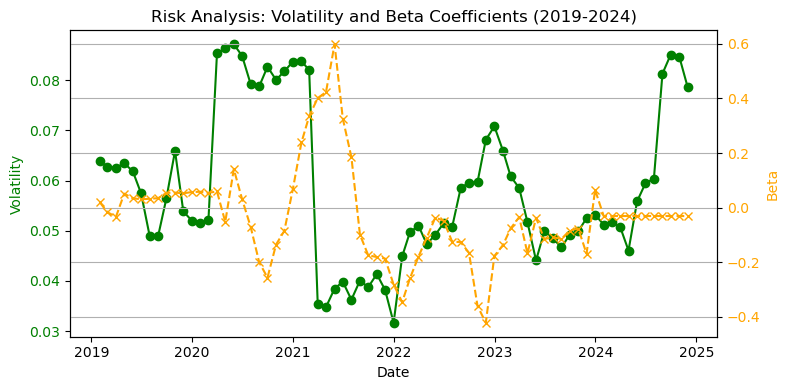

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the volatility CSV file
volatility = pd.read_csv(absolute_path_std)

# Create a list of dates from January 2019 to November 2024 (monthly)
date_range = pd.date_range(start="2019-01-01", end="2024-11-30", freq='M')

# Check if the length of the date range matches the length of the DataFrame
if len(date_range) == len(volatility):
    volatility['Date'] = date_range
else:
    print(f"Error: The size of the dates ({len(date_range)}) does not match the size of the DataFrame ({len(volatility)})")
    # If necessary, adjust the date range size (e.g., truncate or extend)
    date_range = date_range[:len(volatility)]
    volatility['Date'] = date_range
# Convert the 'Date' column to datetime format
volatility['Date'] = pd.to_datetime(volatility['Date'])


# Load the betas CSV file
betas = pd.read_csv("betas_with_months.csv")

# Convert the 'Month' column to datetime format
betas['Month'] = pd.to_datetime(betas['Month'])

# Create a combined plot for volatility and beta coefficients
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot volatility (SBUX) on the primary axis
ax1.plot(volatility['Date'], volatility['SBUX'], label="Volatility (Standard Deviation)", color="green", marker="o")
ax1.set_xlabel("Date")
ax1.set_ylabel("Volatility", color="green")
ax1.tick_params(axis='y', labelcolor="green")

# Plot beta coefficients on a secondary axis
ax2 = ax1.twinx()
ax2.plot(betas['Month'], betas['Beta'], label="Beta", color="orange", linestyle="--", marker="x")
ax2.set_ylabel("Beta", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Add the title
plt.title("Risk Analysis: Volatility and Beta Coefficients (2019-2024)")

# Improve the layout and appearance
fig.tight_layout()

# Add a grid to the plot
plt.grid(True)

# Display the plot
plt.show()


Volatility and beta values show how much Starbucks is affected by market risk.
Volatility peaks in 2020 and 2022 reflect global uncertainty and economic challenges. Starbucks stock has a low beta (less than 0.5), meaning it is a relatively safe investment that does not move much with the overall market.
The sharp ups and downs during the pandemic and times of inflation show that investors feel more uncertain. Low beta values show that Starbucks is a less risky investment when compared to stocks that are highly sensitive to the market.

Section 4: Correlation Heatmap (Price and other variables)

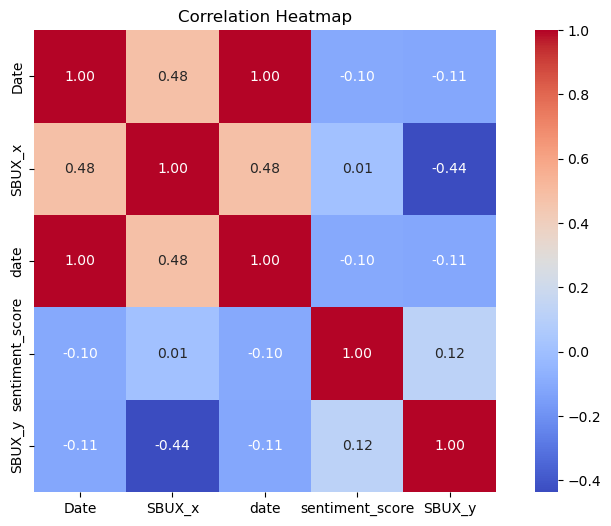

In [210]:
import seaborn as sns


# Load data for correlation analysis
# Load data
prices = pd.read_csv("SBUX_price_data_close_per_month.csv")
sentiments = pd.read_csv(absolute_path_Sentiment)

# Convert dates
prices['Date'] = pd.to_datetime(prices['Date'])
sentiments['date'] = pd.to_datetime(sentiments['date'])
volatility['Date'] = pd.to_datetime(volatility['Date'])

# Merge datasets
merged_data = pd.merge(prices, sentiments, left_on='Date', right_on='date')
merged_data = pd.merge(merged_data, volatility, on='Date')

# Calculate the correlation matrix
correlation_matrix = merged_data.corr()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()



Interpretation :

The correlation heatmap shows how market sentiments, stock prices and economic factors are related.
The weak link between sentiment scores and stock prices indicates that feelings alone do not cause price changes. A moderately strong correlation exists between stock prices, volatility, as well as beta coefficients. This suggests that macroeconomic conditions importantly influence Starbucks' financial performance.
Sentiment effects seem to be more about psychology and short-term changes, while stock prices are mainly influenced by financial basics and market conditions. Periods of uncertainty can be navigated and opportunities can be identified, by investors who understand these relationships.

Let's make a visualisation in 3 dimensions with FED Reserve interest rate and inflation level. The dependent variable stays the same.


[-0.05387746 -7.46290655  7.82105888]


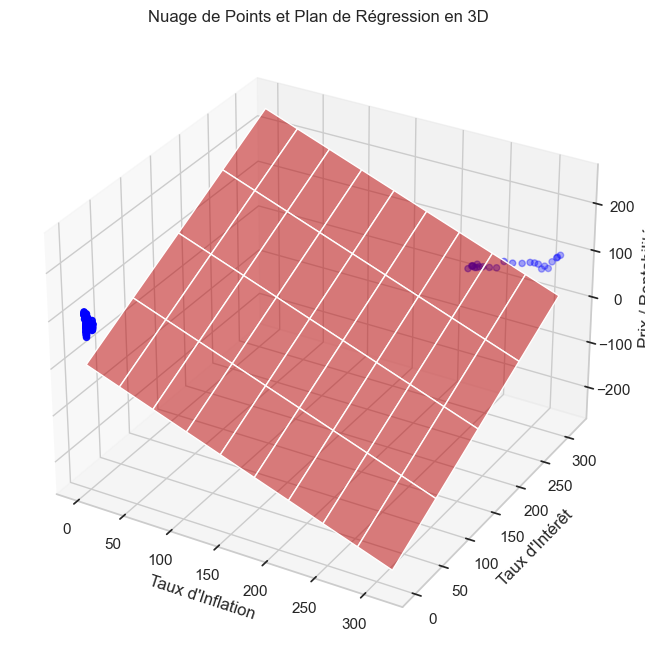

In [291]:
X_3 = np.array(super_liste[:3])
X_3.shape = (71, 3)

Beta_3 = inv(X_3.T @ X_3) @ X_3.T @ y

print(Beta_3)


X1_grid, X2_grid = np.meshgrid(np.linspace(min(X_3[:, 1]), max(X_3[:, 1]), 10),
                               np.linspace(min(X_3[:, 2]), max(X_3[:, 2]), 5))
Y_grid = Beta_3[0] + Beta_3[1] * X1_grid + Beta_3[2] * X2_grid

# In 3D to vizualize
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Nuage de points
ax.scatter(X_3[:, 1], X_3[:, 2], y, color='blue', label='Données (Nuage de Points)')


ax.plot_surface(X1_grid , X2_grid, Y_grid * 0.1, color='red', alpha=0.5)


# Quelques légendes.
ax.set_title('Nuage de Points et Plan de Régression en 3D')
ax.set_xlabel('Taux d\'Inflation')
ax.set_ylabel('Taux d\'Intérêt')
ax.set_zlabel('Prix / Rentabilité')

plt.show()


# Asset price prediction model based on random forest model coefficients of sentiments and CPI

Since we can't make a sixth dimension graph, we will be doing a graph based on only 3 variable for asset price prediction

Mean Squared Error: 25.691931585781855
Feature Importances:
               Variable  Importance
2     list_CPI_agregate    0.550741
4      std_SBUX_monthly    0.313417
1     list_fed_agregate    0.061524
0  all_sentiment_scores    0.038974
3            betas_list    0.035345


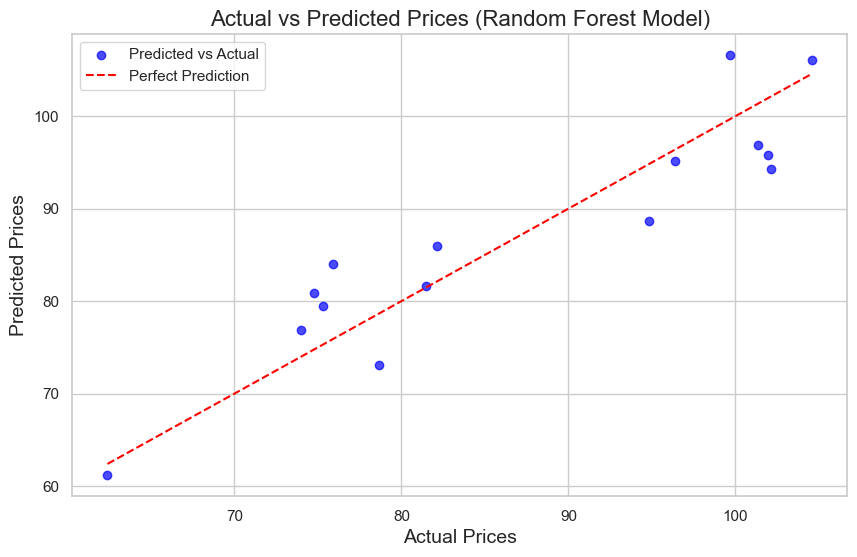

In [216]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# 1. Prepare your dataset
# Assuming 'dt' is your dataframe with the relevant data.
dt["betas_list"] = betas_list
dt["std_SBUX_monthly"] = std_SBUX_monthly

# Define the feature columns (X) and target (y)
X = dt[['all_sentiment_scores', 'list_fed_agregate', 'list_CPI_agregate', 'betas_list', 'std_SBUX_monthly']]
y = dt['List_prix_agregate']

# 2. Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# 3. Feature scaling (optional for Random Forest, but generally good practice)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Create and train the Random Forest model
forest_model = RandomForestRegressor(n_estimators=100, random_state=45)  # Adjust hyperparameters as needed
forest_model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = forest_model.predict(X_test)

# 6. Evaluate the model (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 7. Feature Importance
feature_importances = forest_model.feature_importances_
importance = pd.DataFrame({'Variable': X.columns, 'Importance': feature_importances})
importance = importance.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance)

# 8. Plotting Actual vs Predicted prices
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)

# Add a line of perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title("Actual vs Predicted Prices (Random Forest Model)", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.legend()

# Show plot
plt.show()


# Final conclusion
This project looked at the multiple factors that affect Starbucks' stock prices by analyzing market sentiments, stock prices, financial risks, economic connections and statistical models. We chose Starbucks as a case study to show two important times: the COVID-19 pandemic (2019–2022) and the geopolitical controversies of 2023.
This detailed analysis shows that Starbucks' performance in financial markets is influenced by market feelings, economic basics and worldwide trends. Highly important periods such as the pandemic or deeply impactful geopolitical controversies show that, while sentiments may have an immediate and intense emotional effect, it is economic indicators coupled with financial risks that fundamentally drive long-term variations.

# Get the requirement.txt 

In [ ]:
!pip freeze > requirements.txt

